In [1]:
# -*- coding: utf-8 -*-
%matplotlib inline

# Life Game

In [2]:
# Core Code

import numpy as np
import matplotlib as mpl
import PIL
from PIL import Image
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
import time

# Game Configuration
Config = {
    "width": 60,
    "height": 60,
    "resolution": 60,
    "theme": ["white", "black"],
    "initialization": {
        "spawnCount": 1800
    },
}

# DPI configuration
mpl.rcParams['figure.dpi'] = Config["resolution"]

# Stores an array of file names of saved images (per frame)
ImageStream = []

# Randomize every board
np.random.seed(int(time.time()))

# 1 is alive, 0 is dead, create initial canvas with spawnCount config
Canvas = np.concatenate(
    (
        np.ones(Config["initialization"]["spawnCount"]),
        np.zeros(Config["width"] * Config["height"] - Config["initialization"]["spawnCount"])
    ),
    axis=None
)
np.random.shuffle(Canvas)
Canvas = Canvas.reshape(Config["height"], Config["width"])

# Color map used by matplotlib
Cmap = ListedColormap(Config["theme"])

# Initialize the board
def initialize():
    global Canvas
    global Cmap
    global ImageStream
    Canvas = np.concatenate(
        (
            np.ones(Config["initialization"]["spawnCount"]),
            np.zeros(Config["width"] * Config["height"] - Config["initialization"]["spawnCount"])
        ),
        axis=None
    )
    np.random.shuffle(Canvas)
    Canvas = Canvas.reshape(Config["height"], Config["width"])
    Cmap = ListedColormap(["white", "black"])
    ImageStream = []

# Do once
initialize()

FPSTimer = 0

def fpsAdd(dt):
    global FPSTimer
    FPSTimer += dt
def fpsShow():
    global FPSTimer
    print("FPS:", 1/FPSTimer)
    FPSTimer = 0
# Decorators for performance analysis
def draw_performance(func):
    def inner():
        print(FPSTimer)
        beginTime = time.perf_counter()
        output = func()
        endTime = time.perf_counter()
        fpsAdd(endTime - beginTime)
        fpsShow()
        return output
    return inner
def save_performance(func):
    def inner(arg):
        beginTime = time.perf_counter()
        output = func(arg)
        endTime = time.perf_counter()
        fpsAdd(endTime - beginTime)
        fpsShow()
        return output
    return inner
def update_performance(func):
    def inner(arg):
        beginTime = time.perf_counter()
        output = func(arg)
        endTime = time.perf_counter()
        fpsAdd(endTime - beginTime)
        return output
    return inner

# Simply draw the function
@draw_performance
def draw() -> bool:
    plt.grid(False)
    plt.axis('off')
    plt.imshow(Canvas, cmap = Cmap)
    plt.show()
    return True

# Save the image to file
@save_performance
def save(fileName) -> bool:
    plt.grid(False)
    plt.axis('off')
    plt.imshow(Canvas, cmap = Cmap)
    plt.savefig(fileName, transparent=True)
    ImageStream.append(fileName)
    return True

# Updates the Canvas
@update_performance
def update(canvas, frameCount = 1):
    updatedCanvas = canvas.copy()
    def computeLife(canvas, xId, yId):
        state = canvas[xId, yId] # Current status
        s = np.sum(
            canvas[
                max(0, xId-1):min(Config["height"]+1, xId+2),
                max(0, yId-1):min(yId+2, Config["width"] + 1)
            ]
        ) # 3x3 grid including center
        if state: # Previously alive
            return s - state == 2 or s - state == 3
        else: # Previously dead
            return s == 3
    # Basic iteration
    for xId in range(Config["height"]):
        for yId in range(Config["width"]):
            updatedCanvas[xId, yId] = computeLife(canvas, xId, yId)
    return updatedCanvas

0


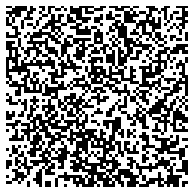

FPS: 17.562474948568443
0.04273593800098752


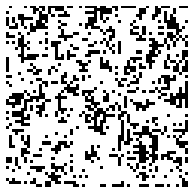

FPS: 10.78033927861865
0.042458332998648984


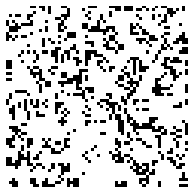

FPS: 10.380679015393794
0.04307916700054193


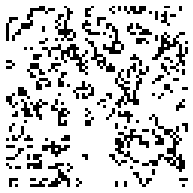

FPS: 10.573560573076668
0.042145313000219176


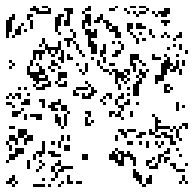

FPS: 10.390734856076188
0.042050521002238384


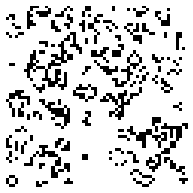

FPS: 10.417457958987034
0.041366665998793906


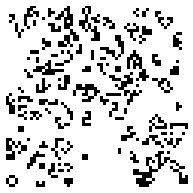

FPS: 10.657962720749332
0.041023957997822436


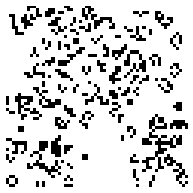

FPS: 10.622112823622716
0.04333385400241241


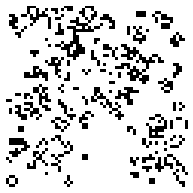

FPS: 10.735493143821056
0.04174583400163101


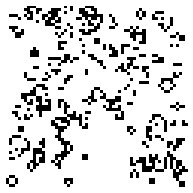

FPS: 10.475260252691605
0.04166510399954859


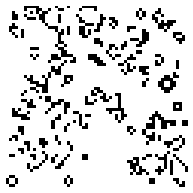

FPS: 10.842924387753184


In [3]:
# Play the game in real time with sequential frames
initialize()
draw()
frame = 0
while frame < 10:
    frame += 1
    Canvas = update(Canvas)
    draw()

0


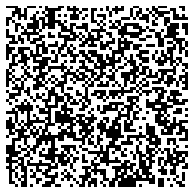

FPS: 17.315236556353327
FPS: 29.27855760166823
FPS: 14.011428168823556
FPS: 12.276371769983742
FPS: 11.28316623239719
FPS: 10.494211786065456
FPS: 9.387421817784954
FPS: 8.753493354920257
FPS: 8.35142084053327
FPS: 7.88303543015233
FPS: 7.130813300927254
FPS: 6.75240816022019
FPS: 6.414132478751298
FPS: 6.09318770139327
FPS: 5.950536144560783
FPS: 5.696957490308278
FPS: 5.418432841043981
FPS: 4.866833791164842
FPS: 4.803626730482813
FPS: 4.513006622764889
FPS: 4.41450349633875
FPS: 4.175338113267719
FPS: 4.199346488451892
FPS: 4.189496121248577
FPS: 4.089535271005085
FPS: 3.903756140248729
FPS: 3.7793713228129038
FPS: 3.6669423351711603
FPS: 3.571913611762133
FPS: 3.431089605220109
FPS: 3.373339031551767
FPS: 3.3034531372064215
FPS: 3.2103158285950246
FPS: 3.1150626289889596
FPS: 2.8049056565998183
FPS: 2.9699294671039422
FPS: 2.9183855276623105
FPS: 2.83497772152252
FPS: 2.6006710329364116
FPS: 2.5487684217059545
FPS: 2.633799045884384
FPS: 2.617379950427042
FPS: 2.5503494840651286
FP

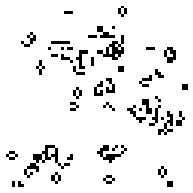

In [6]:
# Play the game but wait for results
initialize()
draw()
frame = 0
save("out"+str(frame)+".png")
while frame < 150:
    frame += 1
    Canvas = update(Canvas)
    save("out"+str(frame)+".png")

In [9]:
Frames = []
print("Frames:", len(ImageStream))
for i in ImageStream:
    newFrame = Image.open(i)
    Frames.append(newFrame)
Frames[0].save('life6.gif', format='GIF',
               append_images=Frames[1:],
               save_all=True,
               duration=3, loop=0, size=(500,500))

Frames: 151


Remember to **update this markdown block** for best view!
![](life6.gif)


Hope you enjoy this mini-project!

## References

1. [Creating Colormaps in Matplotlib](https://matplotlib.org/stable/tutorials/colors/colormap-manipulation.html#sphx-glr-tutorials-colors-colormap-manipulation-py)

2. [Workaround about global variables](https://careerkarma.com/blog/python-local-variable-referenced-before-assignment/#:~:text=The%20UnboundLocalError%3A%20local%20variable%20referenced%20before%20assignment%20error,is%20declared%20before%20you%20assign%20it%20a%20value.)

3. [PNG to GIF using PIL](https://pythonprogramming.altervista.org/png-to-gif/)

4. Official documentations.